<a href="https://colab.research.google.com/github/MissCoul/Lungcancer/blob/main/HW3_Coulibaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
data = pd.read_csv('/HW3Data_lncRNA_2_cancers.csv')

In [ ]:
data

,Ensembl_ID,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,...,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4,Class
0,TCGA-05-4244-01A,2.979519,0.000000,1.894481,0.000000,0.094936,1.601225,0.000000,0.843660,1.822328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
1,TCGA-05-4250-01A,1.761075,0.000000,1.512506,0.000000,0.063790,2.260509,0.000000,1.244437,1.346487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
2,TCGA-05-4382-01A,2.527333,0.000000,1.473132,0.080562,0.314608,1.695952,0.000000,1.358939,1.413738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
3,TCGA-05-4384-01A,2.300864,0.390990,1.507538,0.029133,2.307563,2.058446,0.000000,1.158064,1.711065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
4,TCGA-05-4389-01A,2.388600,0.000000,1.870401,0.000000,0.119019,1.681496,0.000000,0.577340,1.378387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,TCGA-O2-A52S-01A,3.394331,0.000000,2.481494,0.010019,0.035377,1.615140,0.000000,0.549434,3.260978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUSC
1004,TCGA-O2-A52V-01A,3.194320,0.000000,2.430929,0.009584,0.042750,1.354696,0.020611,0.795768,2.261853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUSC
1005,TCGA-O2-A52W-01A,3.601735,0.000000,2.115010,0.000000,0.138727,1.543573,0.045713,0.858949,2.487452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUSC
1006,TCGA-O2-A5IB-01A,3.999554,0.000000,2.671582,0.006871,0.011404,1.583415,0.000000,1.540126,4.045429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUSC


In [ ]:
df=data.drop(columns='Ensembl_ID')

In [ ]:
df.head(5)

,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,ENSG00000122043.9,...,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4,Class
0,2.979519,0.00000,1.894481,0.000000,0.094936,1.601225,0.0,0.843660,1.822328,0.028941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
1,1.761075,0.00000,1.512506,0.000000,0.063790,2.260509,0.0,1.244437,1.346487,0.071080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
2,2.527333,0.00000,1.473132,0.080562,0.314608,1.695952,0.0,1.358939,1.413738,0.020949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
3,2.300864,0.39099,1.507538,0.029133,2.307563,2.058446,0.0,1.158064,1.711065,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
4,2.388600,0.00000,1.870401,0.000000,0.119019,1.681496,0.0,0.577340,1.378387,0.100663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD


In [ ]:
df['Class'] = np.where(df['Class'] == 'LUAD', 1, 0)
X = df.loc[:, df. columns != 'Class']

y = df['Class']
class_names= df.Class
y

0       1
1       1
2       1
3       1
4       1
       ..
1003    0
1004    0
1005    0
1006    0
1007    0
Name: Class, Length: 1008, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier=RandomForestClassifier(n_estimators=100, max_depth=2, random_state=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

y_predict=classifier.predict(X_test)
clf = svm.SVC(random_state=0,probability=True)

y_pred_score = clf.fit(X_train, y_train).predict_proba(np.array(X_test))[:,1]

y_predict_score = classifier.fit(X_train, y_train).predict_proba(np.array(X_test))[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#METRICS CALCULATION FOR SVM
cmatrx = confusion_matrix(y_test, y_pred)
cmatrx
print(classification_report(y_test,y_pred))
print("accuracy", accuracy_score(y_test, y_pred))


#METRIX CALCULATION FOR RF
cm = confusion_matrix(y_test, y_predict)
cm
print(classification_report(y_test,y_predict))
print("accuracy", accuracy_score(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.95      0.96      0.96       174

    accuracy                           0.95       333
   macro avg       0.95      0.95      0.95       333
weighted avg       0.95      0.95      0.95       333

accuracy 0.954954954954955
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       159
           1       0.93      0.97      0.95       174

    accuracy                           0.95       333
   macro avg       0.95      0.95      0.95       333
weighted avg       0.95      0.95      0.95       333

accuracy 0.9459459459459459


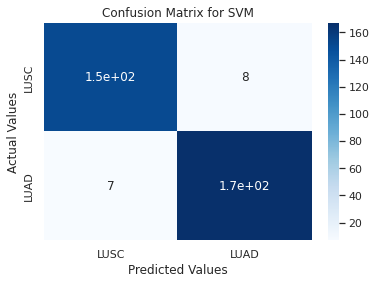

<Figure size 432x288 with 0 Axes>

In [ ]:

# Creating a dataframe for a array-formatted Confusion matrix for SVM and RF so it will be easy for plotting.
cm_df = pd.DataFrame(cmatrx,
                     index = ['LUSC','LUAD'],
                     columns = ['LUSC','LUAD'])

sns.heatmap(cm_df, annot=True, cmap = 'Blues')
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("cmtrx1.png")


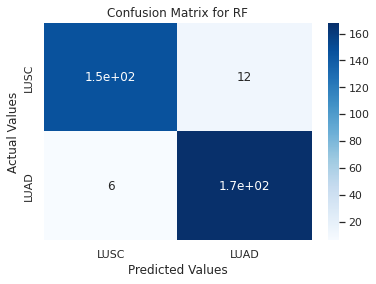

<Figure size 432x288 with 0 Axes>

In [ ]:

# Creating a dataframe for a array-formatted Confusion matrix for SVM and RF so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['LUSC','LUAD'],
                     columns = ['LUSC','LUAD'])

sns.heatmap(cm_df, annot=True, cmap = 'Blues')
plt.title('Confusion Matrix for RF')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("cmtrx1.png")


In [ ]:
from sklearn.metrics import auc
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)
print( "Area under the ROC curve for SVM: %f" % roc_auc)

fpr2, tpr2, thresholds = roc_curve(y_test, y_predict_score)
roc_auc2 = auc(fpr2, tpr2)
print( "Area under the ROC curve for RF: %f" % roc_auc2)


Area under the ROC curve for SVM: 0.984060
Area under the ROC curve for RF: 0.979072


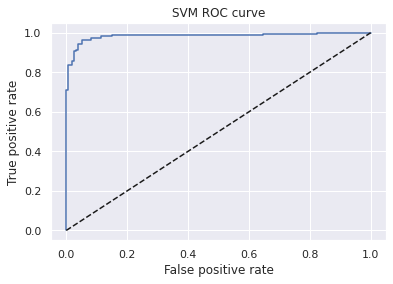

In [ ]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.title(f'SVM ROC curve');

plt.show()

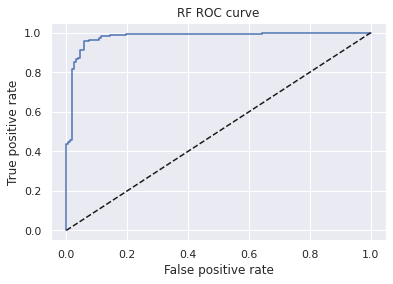

In [ ]:
sns.set()

plt.plot(fpr2, tpr2)

plt.plot(fpr2, fpr2, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.title(f'RF ROC curve');

plt.show()

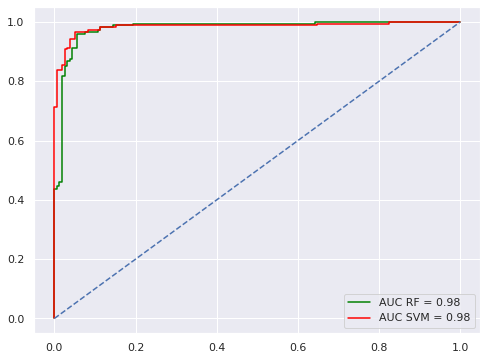

In [ ]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(8,6))

plt.plot(fpr2, tpr2, color='green',label = 'AUC RF = %0.2f' % roc_auc2)
plt.plot(fpr, tpr, color='red',label = 'AUC SVM = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.show()
